In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import lmplot
from seaborn import kdeplot
from seaborn import distplot
import matplotlib.pyplot as plt
import re

In [101]:
df = pd.read_csv('spotify_taylorswift.csv', index_col= 0)
df.head(5)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


# Análisis exploratorio

In [102]:
df.shape

(171, 15)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              171 non-null    object 
 1   album             171 non-null    object 
 2   artist            171 non-null    object 
 3   release_date      171 non-null    object 
 4   length            171 non-null    int64  
 5   popularity        171 non-null    int64  
 6   danceability      171 non-null    float64
 7   acousticness      171 non-null    float64
 8   energy            171 non-null    float64
 9   instrumentalness  171 non-null    float64
 10  liveness          171 non-null    float64
 11  loudness          171 non-null    float64
 12  speechiness       171 non-null    float64
 13  valence           171 non-null    float64
 14  tempo             171 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 21.4+ KB


- Ninguna columna tiene nulos.
- Columnas categóricas: name, album, artist
- Columnas datetime: release_date (se pueden utilizar métodos de pandas para saber día, mes, año por separado)
- El resto de columnas son de tipo np.number

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,171.0,236663.520468,40456.720158,107133.000000,211833.00000,234000.000000,254447.000000,403887.000
popularity,171.0,61.228070,11.904548,0.000000,58.00000,63.000000,67.000000,82.000
danceability,171.0,0.588632,0.115067,0.292000,0.52700,0.593000,0.655500,0.897
acousticness,171.0,0.321634,0.334019,0.000191,0.03045,0.156000,0.674000,0.971
energy,171.0,0.585977,0.189577,0.118000,0.46200,0.606000,0.732000,0.944
instrumentalness,171.0,0.002490,0.018766,0.000000,0.00000,0.000002,0.000064,0.179
liveness,171.0,0.145927,0.090314,0.033500,0.09295,0.115000,0.168000,0.657
loudness,171.0,-7.322111,2.878787,-17.932000,-8.86150,-6.698000,-5.336500,-2.098
speechiness,171.0,0.065583,0.105956,0.023100,0.02950,0.037200,0.055100,0.912
valence,171.0,0.422984,0.192617,0.049900,0.27750,0.416000,0.545000,0.942


In [105]:
df.describe(include=['object']).T

,count,unique,top,freq
name,171,169,The Story Of Us,2
album,171,9,Fearless (Taylor's Version),26
artist,171,1,Taylor Swift,171
release_date,171,9,2021-04-09,26


# Outliers

In [106]:
numericas = df.select_dtypes(include = np.number)
numericas.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [107]:
numericas.round(2)

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,232106,49,0.58,0.57,0.49,0.0,0.12,-6.46,0.03,0.42,76.01
1,173066,54,0.66,0.17,0.88,0.0,0.10,-2.10,0.03,0.82,105.59
2,203040,59,0.62,0.29,0.42,0.0,0.12,-6.94,0.02,0.29,99.95
3,199200,49,0.58,0.05,0.78,0.0,0.32,-2.88,0.03,0.43,115.03
4,239013,50,0.42,0.22,0.48,0.0,0.12,-5.77,0.03,0.26,175.56
...,...,...,...,...,...,...,...,...,...,...,...
166,277591,74,0.66,0.16,0.82,0.0,0.07,-6.27,0.05,0.71,135.94
167,244236,65,0.61,0.85,0.37,0.0,0.08,-8.82,0.03,0.13,106.01
168,189495,67,0.59,0.22,0.61,0.0,0.09,-7.06,0.04,0.51,90.20
169,208608,66,0.56,0.51,0.47,0.0,0.11,-11.55,0.05,0.40,101.93


 - Después de haber creado un nuevo df solo con las columnas numéricas, redondeamos a dos decimales para no perdernos en la inmensidad de números tan grandes.

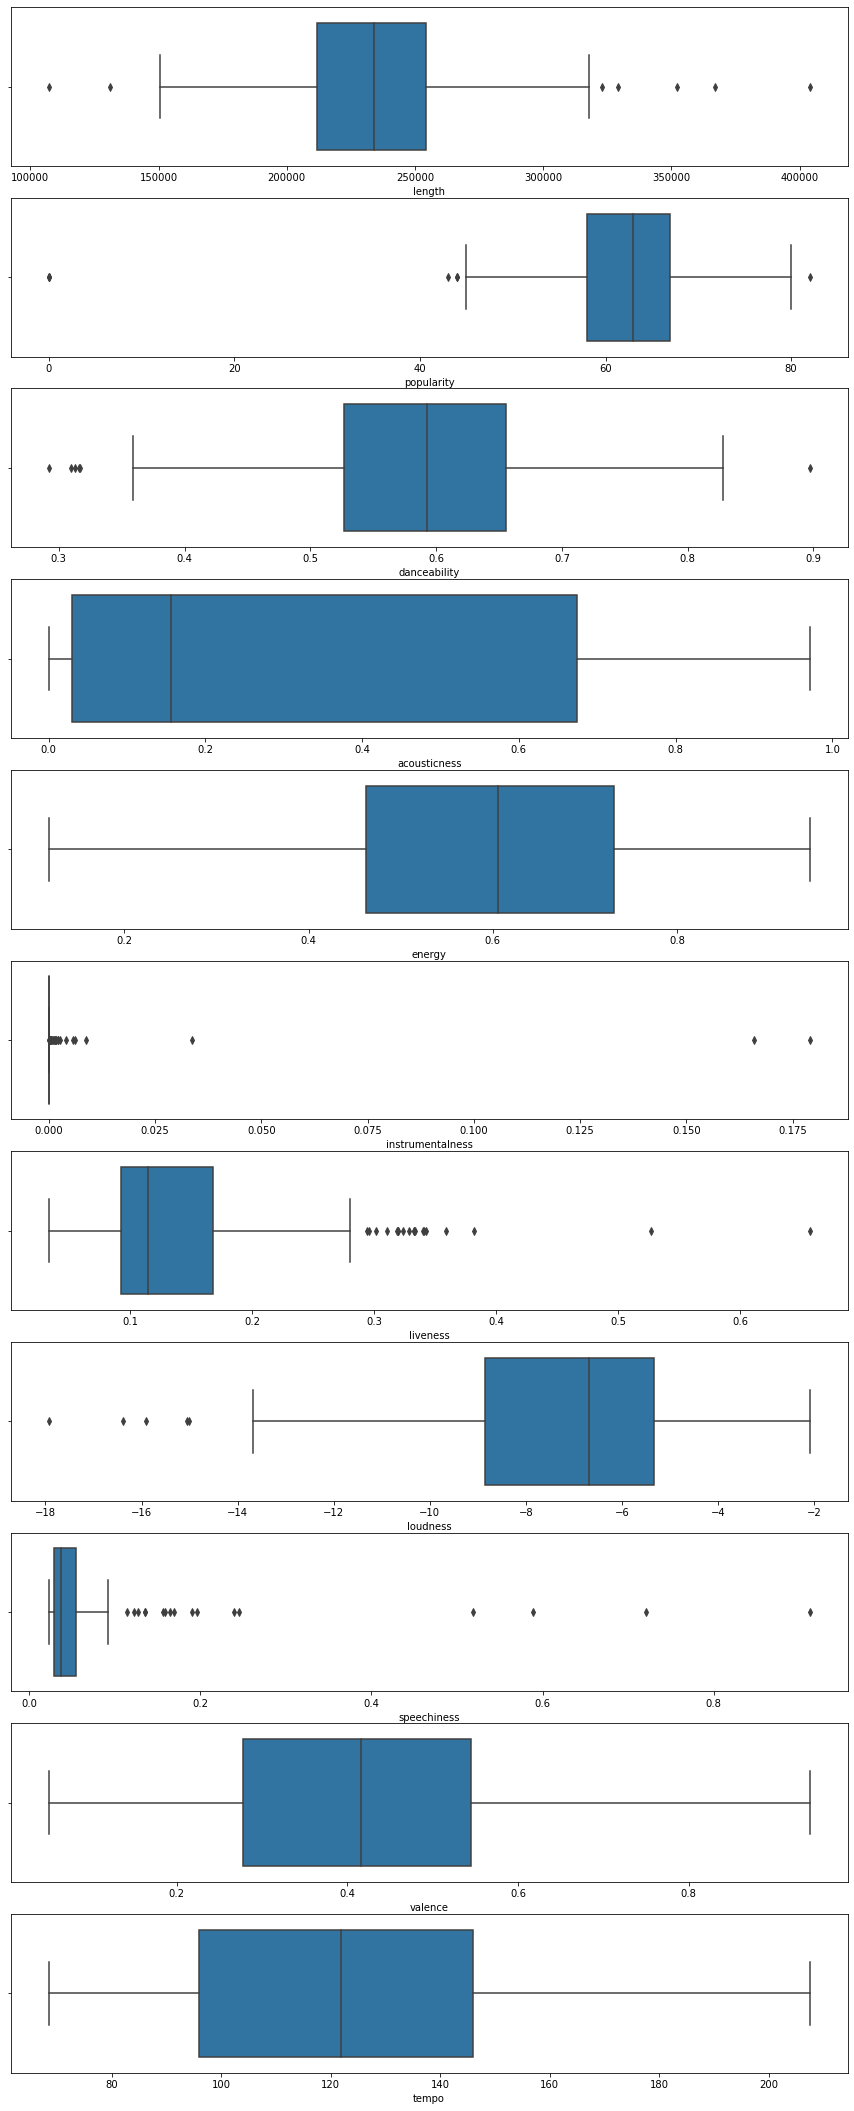

In [108]:
fig, axes = plt.subplots(11,1, figsize = (15,38))

for i, col in enumerate(numericas.columns):
    sns.boxplot(x=numericas.columns[i], data=df, ax=axes[i])

plt.show()

Columnas con outliers:
- Length: valores entre 150000 y 325000
- Popularity: entre 45 y 80
- Danceability: entre 0.35 y 0.85
- Instrumentalness: son todo outliers
- Liveness: entre 0 y 0.3
- Loudness: entre -14 y -2
- Speechiness: entre 0 y 0.1

In [109]:
df.drop('instrumentalness', axis=1, inplace=True)

Borramos la columna instrumentalness porque todos los datos son outliers, no aporta al estudio.

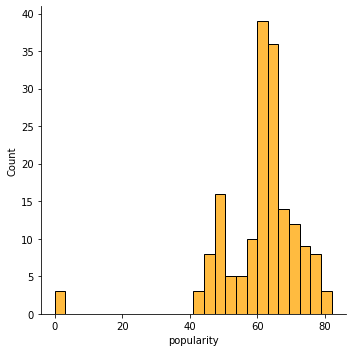

In [110]:
sns.displot(
    df.popularity, 
    color='orange', 
    kde_kws = {'shade': True, 'linewidth': 1});

Vemos que los datos en la que hasta ahora consideramos variable respuesta ('popularity') no son normales, están entre 40 y 80. Para ello habrá que retirar el resto de datos y ver si la gráfica se normaliza y adopta la dimensión de una campana de Gauss.

In [111]:
df = df[df['popularity'] > 40]
df.shape

(168, 14)

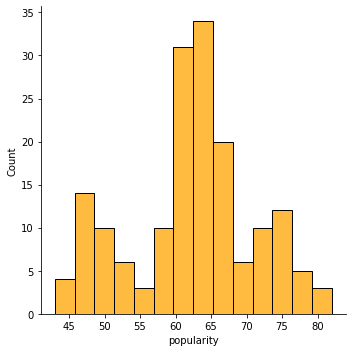

In [112]:
sns.displot(
    df.popularity, 
    color='orange', 
    kde_kws = {'shade': True, 'linewidth': 1});

Está más normalizado, pero no del todo. Seguiremos adelante y, en caso de no ser suficiente, volveremos a recortar la horquilla. 

# Variables predictoras

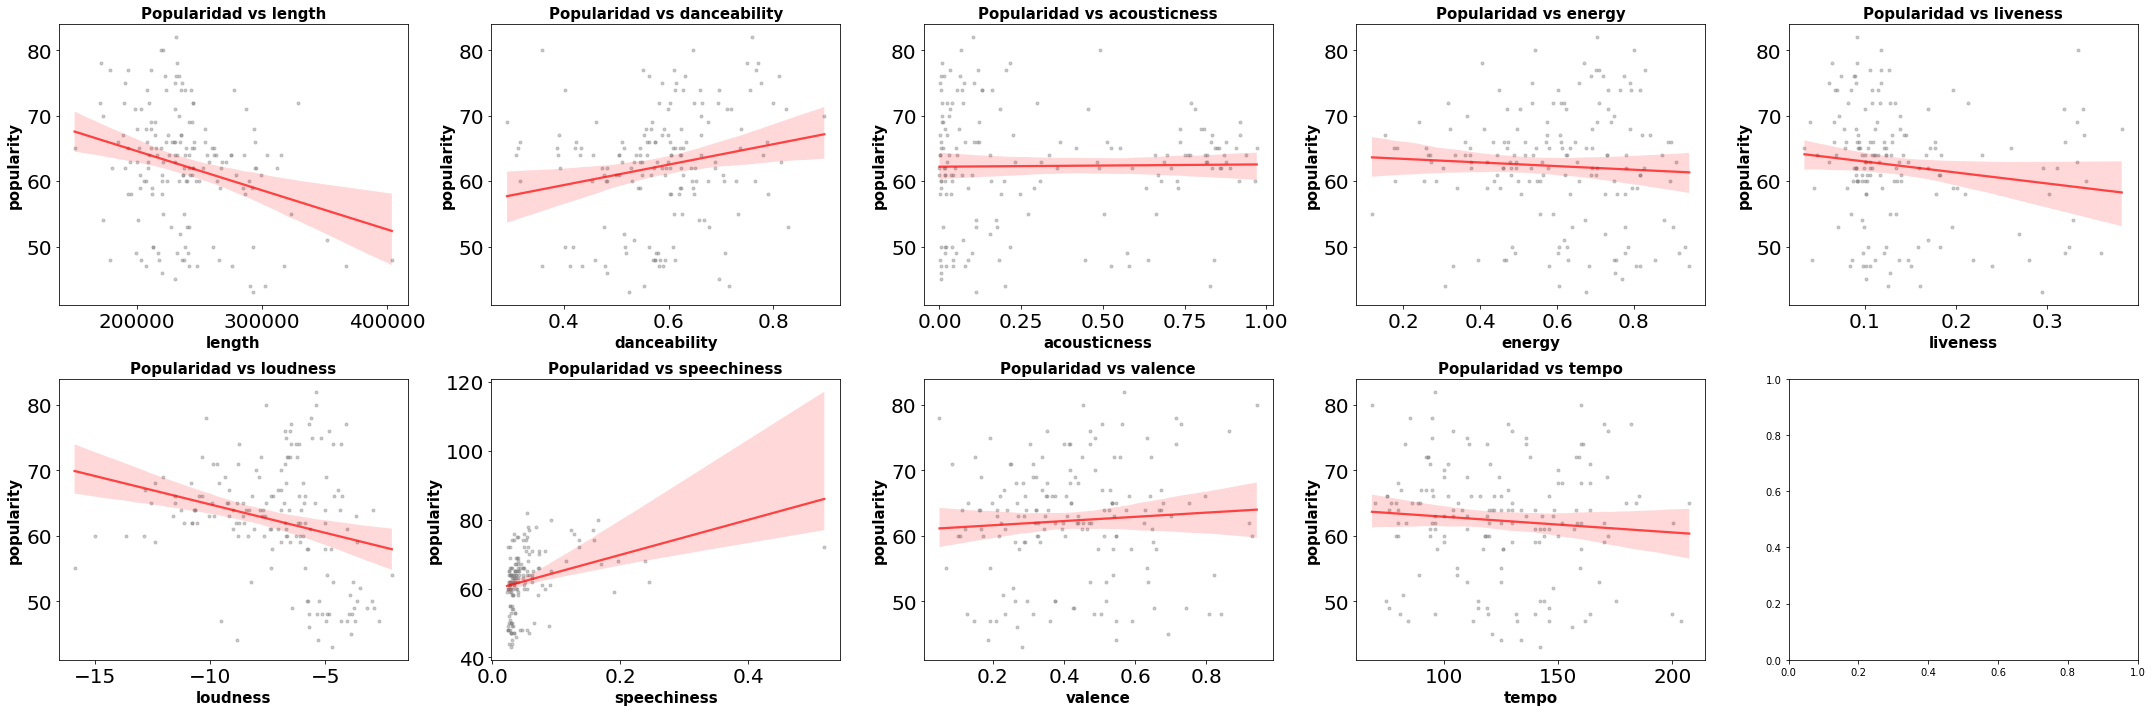

In [113]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("popularity")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["popularity"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Popularidad vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel(colum,  fontsize = 15, fontweight = "bold")
    axes[i].set_ylabel("popularity", fontsize = 15, fontweight = "bold")
    
fig.tight_layout();

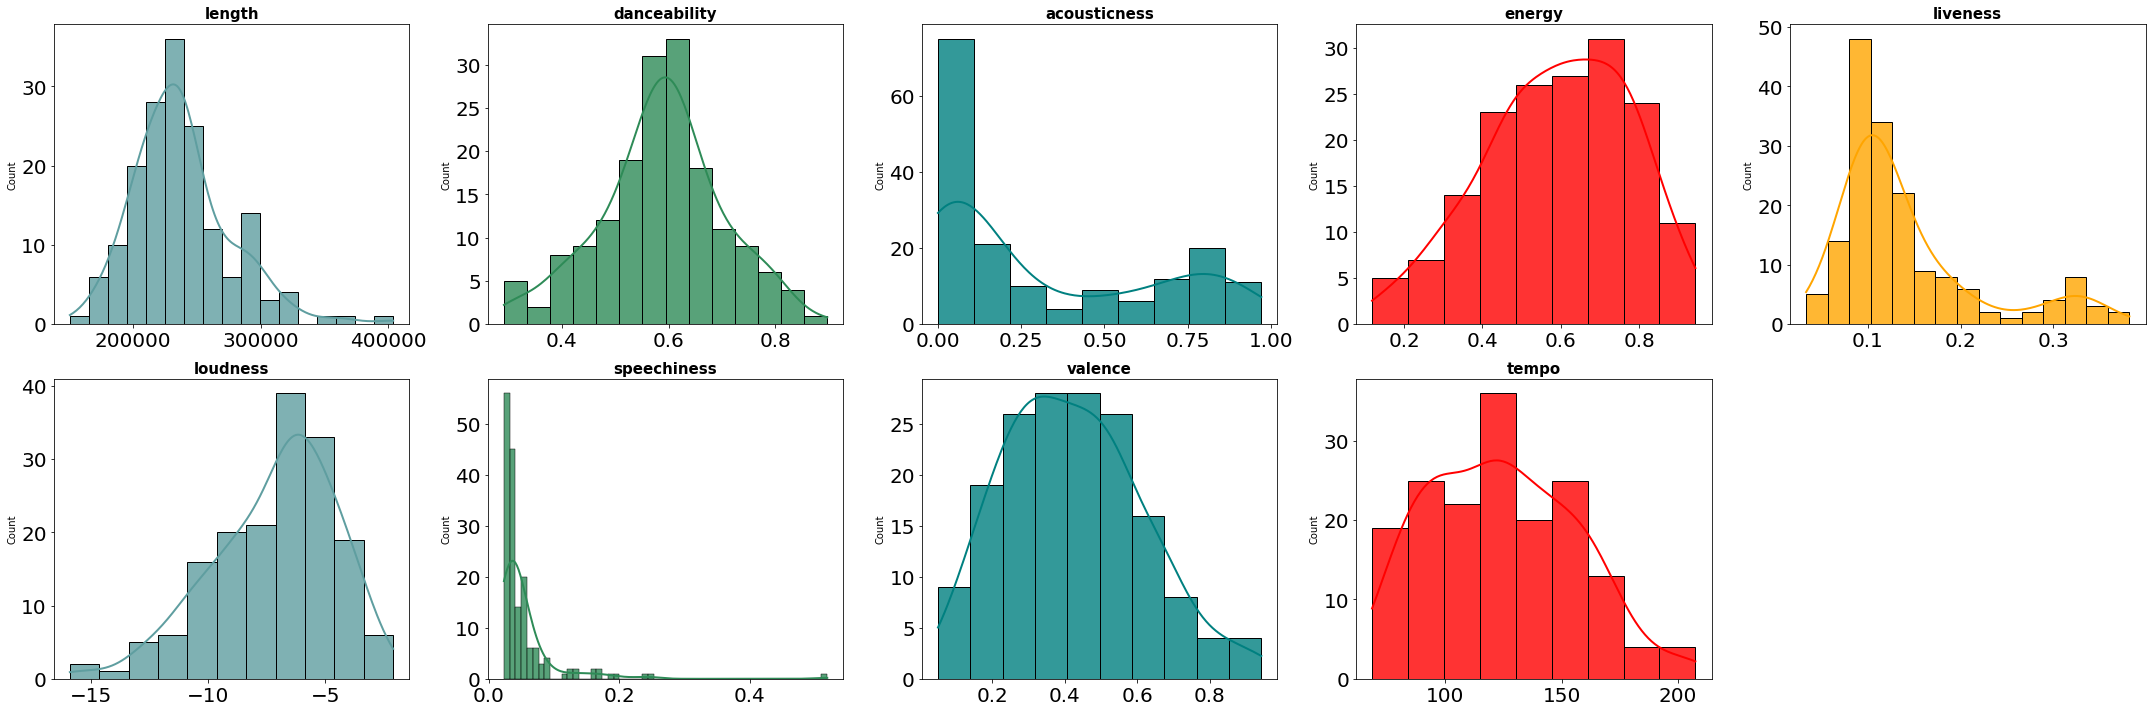

In [114]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================


fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (30, 10))

lista_colores = ["cadetblue", "seagreen", "teal", "red", 'orange', "cadetblue", "seagreen", "teal", "red"]
axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("popularity")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.8, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.delaxes(axes[-1])
fig.tight_layout();

 - Las columnas que parecen tener más relación con 'popularity' son: 'length', 'danceability', 'liveness' y 'energy'.

/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Almudena/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

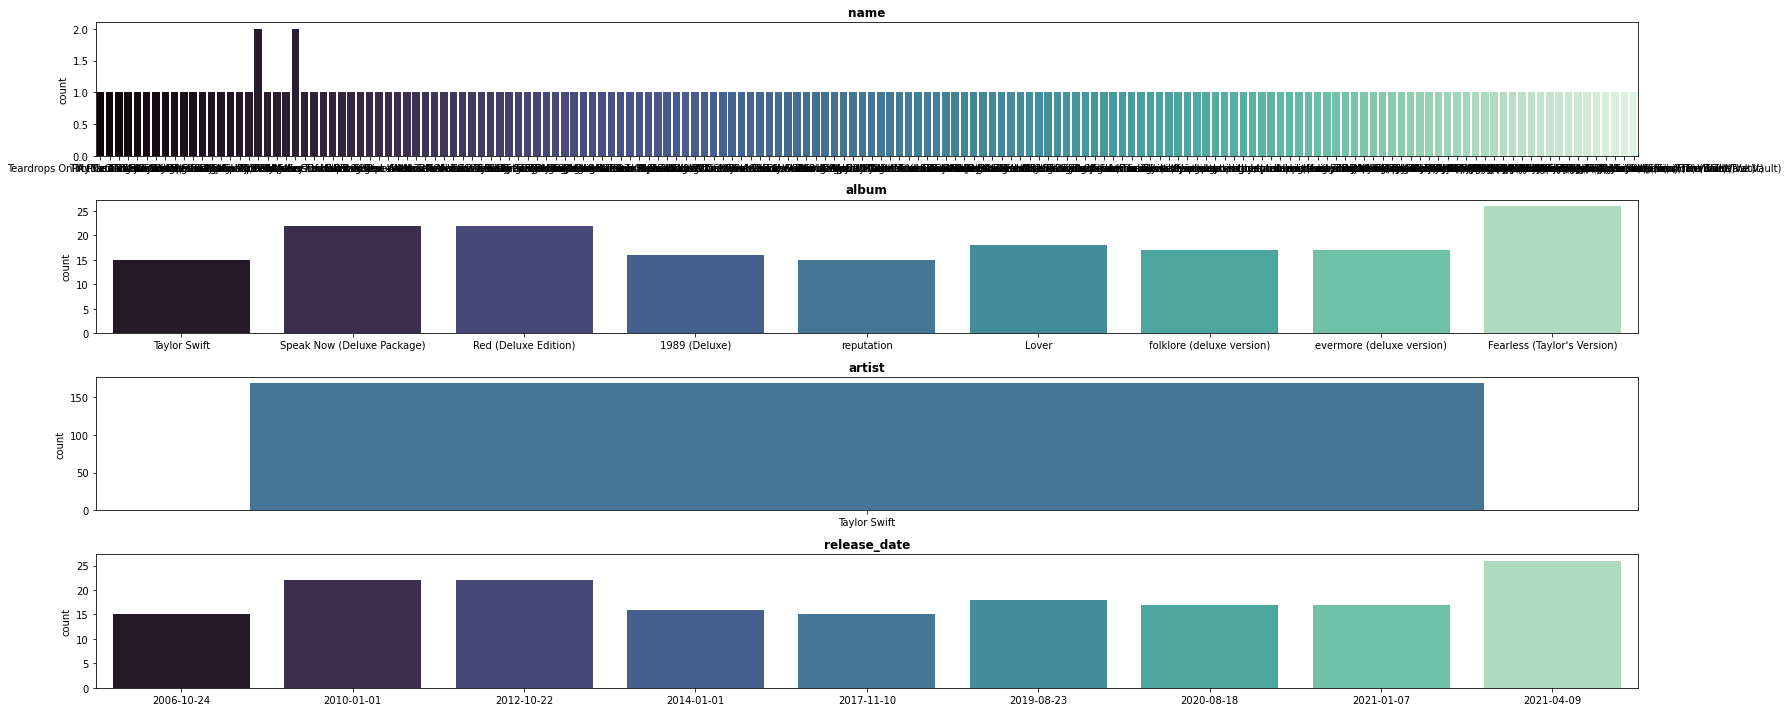

In [115]:
# Gráfico para cada variable cualitativa
# ==============================================================================

fig, axes = plt.subplots(4, 1, figsize = (25,10))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    sns.countplot(df[colum], ax=axes[i], palette="mako")
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

 - Al haber tantas canciones no se entiende nada en la gráfica de 'name'.
 - La columna 'artist' no tiene sentido porque todas las canciones son de Taylor Swift.
 - El disco Fearless (Taylor's Version) aparece con un mayor contador porque es el que más canciones tiene.

# Correlación entre variables numéricas

In [116]:
numericas2 = df.select_dtypes(include=np.number).drop('popularity', axis=1)
numericas2.head()

,length,danceability,acousticness,energy,liveness,loudness,speechiness,valence,tempo
0,232106,0.580,0.575,0.491,0.1210,-6.462,0.0251,0.425,76.009
1,173066,0.658,0.173,0.877,0.0962,-2.098,0.0323,0.821,105.586
2,203040,0.621,0.288,0.417,0.1190,-6.941,0.0231,0.289,99.953
3,199200,0.576,0.051,0.777,0.3200,-2.881,0.0324,0.428,115.028
4,239013,0.418,0.217,0.482,0.1230,-5.769,0.0266,0.261,175.558


/var/folders/cc/w29nscnn2p75y27g1lx9hz000000gn/T/ipykernel_16975/4132898669.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(numericas2.corr(), dtype = np.bool))


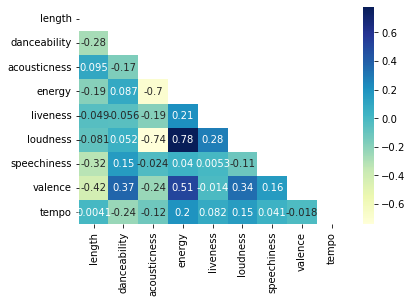

In [117]:
mask = np.triu(np.ones_like(numericas2.corr(), dtype = np.bool))
sns.heatmap(numericas2.corr(), 
           cmap = "YlGnBu", 
           annot = True, 
           mask =mask);

Si hay dos variables que se correlacionan mucho (por encima de 0.7) utilizaríamos solo una de ellas (la más importante de ellas) para que no quede redundante. Ej: loudness y energy.

In [118]:
df.drop('loudness', axis=1, inplace=True)

In [119]:
numericas.drop(['loudness', 'instrumentalness'], axis=1, inplace=True)

# Limpieza

### Outliers

In [120]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices

In [121]:
lista_columnas = list(numericas.columns)
lista_columnas

['length',
 'popularity',
 'danceability',
 'acousticness',
 'energy',
 'liveness',
 'speechiness',
 'valence',
 'tempo']

In [122]:
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'length': [19, 23, 27, 41, 58], 'popularity': [13, 15, 22, 25, 35, 60, 64, 95], 'danceability': [97, 98, 114, 123, 127, 132], 'liveness': [3, 10, 17, 24, 30, 33, 35, 50, 59, 62, 64, 90, 91, 102, 112, 145, 146, 152, 162, 164], 'speechiness': [44, 64, 66, 78, 80, 83, 85, 86, 88, 90, 93, 94, 95, 105, 128, 141], 'valence': [64]}


In [128]:
for k, v in ind.items():
    mediana = df[k].median() 
    for i in v: 
        df.loc[i,k] = mediana